In [1]:
include("lna.jl")
using DifferentialEquations, StatsBase, Plots

## One mrna species

In [2]:
rn = @reaction_network begin
    ρ_r, 0 --> R
    δ_r, R --> 0
    ρ_m, 0 --> M
    δ_m, M --> 0
    σ_b, M + R --> MR
    δ_u, MR --> M + R
    ρ_p, MR --> MR + P
    δ_r, MR --> 0
    δ_r, P --> 0
end ρ_r δ_r ρ_m δ_m σ_b δ_u σ_u ρ_p

ps = [ 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1 ]

prob = LNAProblem(rn, [0,0,0,0], ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

4×4 Array{Float64,2}:
  3.40394   -2.25494   -0.137453   0.110009
 -2.25494    3.40394   -0.137453   0.110009
 -0.137453  -0.137453   6.87097    3.25675
  0.110009   0.110009   3.25675   11.939

In [10]:
prob = DiscreteProblem(rn, [1, 1, 8, 8], (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Array{Float64,1}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Array{Array{Int64,1},1}:
 [1, 1, 8, 8]
 [1, 2, 12, 10]
 [5, 0, 9, 10]
 [2, 1, 9, 8]
 [1, 0, 8, 6]
 [0, 3, 12, 7]
 [2, 0, 11, 10]
 [1, 0, 9, 8]
 [0, 5, 10, 11]
 [2, 0, 7, 8]
 [0, 5, 9, 5]
 [5, 0, 15, 10]
 [5, 0, 12, 11]
 ⋮
 [2, 3, 8, 6]
 [0, 9, 11, 3]
 [0, 4, 3, 5]
 [2, 0, 3, 4]
 [1, 2, 12, 8]
 [1, 5, 3, 7]
 [2, 1, 6, 5]
 [4, 0, 9, 7]
 [0, 3, 10, 5]
 [1, 5, 11, 11]
 [4, 0, 11, 13]
 [2, 1, 6, 10]

In [11]:
mean(sol.u) - [1.3177446889773325, 1.31774468897734, 8.682255311022661, 8.682255311022661]

4-element Array{Float64,1}:
  0.5601377533738203
  0.5441580729674209
 -0.5613777285743105
 -0.5703975481779189

In [12]:
(StatsBase.cov(sol.u) - lnacovs)

4×4 Array{Float64,2}:
  0.663272   0.372572  -0.339305    -0.153189
  0.372572   0.652133  -0.329813    -0.161702
 -0.339305  -0.329813  -0.00814294  -0.00401122
 -0.153189  -0.161702  -0.00401122  -0.560378

## Two mrna species

In [13]:
rn = @reaction_network begin
    ρ_r, 0 --> R
    δ_r, R --> 0
    ρ_m1, 0 --> M1
    δ_m1, M1 --> 0
    σ_b1, M1 + R --> MR1
    δ_u1, MR1 --> M1 + R
    ρ_p1, MR1 --> MR1 + P
    ρ_m2, 0 --> M2
    δ_m2, M2 --> 0
    σ_b2, M2 + R --> MR2
    δ_u2, MR2 --> M2 + R
    ρ_p2, MR2 --> MR2 + P
    δ_r, MR1 --> 0
    δ_r, MR2 --> 0
    δ_r, P --> 0
end ρ_r δ_r ρ_m1 δ_m1 σ_b1 δ_u1 σ_u1 ρ_p1 ρ_m2 δ_m2 σ_b2 δ_u2 σ_u2 ρ_p2

ps = [ 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1 ]

prob = LNAProblem(rn, [0,0,0,0,0,0], ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

6×6 Array{Float64,2}:
  0.198997   -0.15389   0.0408867   0.0875771  -0.15389   0.0408867
 -0.15389     7.39258  -1.12692    -1.10357     2.29636  -1.12692
  0.0408867  -1.12692   4.86125     2.38602    -1.12692  -0.042524
  0.0875771  -1.10357   2.38602    14.5796     -1.10357   2.38602
 -0.15389     2.29636  -1.12692    -1.10357     7.39258  -1.12692
  0.0408867  -1.12692  -0.042524    2.38602    -1.12692   4.86125

In [14]:
prob = DiscreteProblem(rn, [1, 1, 8, 8, 8, 8], (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Array{Float64,1}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Array{Array{Int64,1},1}:
 [1, 1, 8, 8, 8, 8]
 [2, 4, 5, 9, 5, 10]
 [0, 5, 5, 4, 4, 3]
 [0, 5, 6, 13, 8, 10]
 [0, 2, 6, 9, 2, 3]
 [0, 2, 3, 10, 6, 8]
 [0, 5, 6, 11, 3, 6]
 [1, 5, 5, 7, 5, 6]
 [2, 4, 1, 11, 5, 3]
 [0, 15, 2, 10, 12, 6]
 [0, 1, 7, 18, 5, 9]
 [0, 3, 5, 10, 6, 4]
 [0, 7, 2, 9, 7, 5]
 ⋮
 [0, 6, 3, 9, 10, 3]
 [1, 10, 2, 6, 6, 6]
 [0, 5, 5, 8, 6, 2]
 [1, 2, 5, 10, 3, 5]
 [0, 9, 4, 12, 6, 2]
 [0, 6, 3, 17, 11, 5]
 [0, 2, 5, 15, 1, 7]
 [0, 3, 2, 10, 8, 8]
 [0, 2, 8, 9, 7, 4]
 [0, 6, 7, 14, 7, 4]
 [0, 2, 5, 4, 6, 12]
 [0, 12, 3, 10, 11, 4]

In [15]:
mean(sol.u) - lnameans

6-element Array{Float64,1}:
  0.0496677087371494
  0.0033742835599905874
 -0.026773815569350212
 -0.06504740114329799
  0.024653857968503168
 -0.024693857168517575

In [16]:
StatsBase.cov(sol.u) - lnacovs

6×6 Array{Float64,2}:
  0.0818223  -0.111845      0.0298335    0.0362275    -0.113657    0.0265499
 -0.111845   -0.0726247     0.00880905  -0.000700242  -0.0888804   0.0719419
  0.0298335   0.00880905   -0.0982209   -0.0840707     0.0795864  -0.0192288
  0.0362275  -0.000700242  -0.0840707   -0.0148752     0.0833792  -0.0320352
 -0.113657   -0.0888804     0.0795864    0.0833792     0.0231636   0.060215
  0.0265499   0.0719419    -0.0192288   -0.0320352     0.060215   -0.0258736

# Arbitrary number of mRNA

In [34]:
function reaction(n)
    "ρ_m$(n), 0 --> M$(n)
    δ_m$(n), M$(n) --> 0
    σ_b$(n), M$(n) + R --> MR$(n)
    δ_u$(n), MR$(n) --> M$(n) + R
    ρ_p$(n), MR$(n) --> M$(n) + P$(n) + R
    δ_r, MR$(n) --> 0
    δ_r, P$(n) --> 0
    "
end

function endstring(n)
    cumulative_string = "end ρ_r δ_r "
    for i in 1:n
        cumulative_string = string(cumulative_string, "ρ_m$(i) δ_m$(i) σ_b$(i) δ_u$(i) σ_u$(i) ρ_p$(i) ")
    end
    cumulative_string
end

function generate_rn(n)
    rnstring = "rn = @reaction_network begin
        ρ_r, 0 --> R
        δ_r, R --> 0
    "
    for i in 1:n
        rnstring = string(rnstring, reaction(i))
    end
    rnstring = string(rnstring, endstring(n))
    rnexpression = Base.Meta.parse(rnstring)
    eval(rnexpression)
end

function generate_propensities(n)
    rand(Float64, (6*n+2))
end

function relative_error(true_val, approx_val)
    map(abs, 1 .- approx_val./true_val)
end

relative_error (generic function with 1 method)

In [82]:
N = 11

rn = generate_rn(N)

ps = generate_propensities(N)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 500000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 5001-element Array{Float64,1}:
      0.0
    100.0
    200.0
    300.0
    400.0
    500.0
    600.0
    700.0
    800.0
    900.0
   1000.0
   1100.0
   1200.0
      ⋮
 498900.0
 499000.0
 499100.0
 499200.0
 499300.0
 499400.0
 499500.0
 499600.0
 499700.0
 499800.0
 499900.0
 500000.0
u: 5001-element Array{Array{Int64,1},1}:
 [1, 3, 1, 1, 2, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 2, 1, 1, 2, 1, 1]
 [0, 3, 0, 1, 5, 0, 0, 0, 0, 0  …  0, 1, 1, 3, 0, 0, 0, 2, 0, 0]
 [0, 1, 0, 0, 4, 0, 0, 2, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 2, 0, 0]
 [1, 3, 0, 0, 2, 0, 0, 1, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 2, 0, 0, 1, 0, 0]
 [0, 3, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 4, 1, 0, 4, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 3, 1, 2, 1, 0, 0, 1, 0, 0  …  0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 4, 1, 0, 5, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 

In [58]:
1 .- (lnameans ./ mean(sol.u))

31-element Array{Float64,1}:
  0.17333381595310726
 -0.06840542042700881
  0.11728708406457067
 -0.019717591577941285
 -0.0408932039094263
 -0.9970640973604106
 -5.208947432138827
 -0.012031356341333899
  0.25141765089500656
  0.021286434078033878
 -0.0004504881443159192
 -0.15878477859077855
 -0.2586306974932846
  ⋮
 -0.0009589054770748895
 -0.012918667151200047
 -0.055455992350669
 -0.0477705868719025
 -0.1215002307804196
 -0.019602307638992622
 -0.031345243806040424
  0.009906987917959964
 -0.18282100968233816
 -0.04835518372438852
  0.4512102717514884
  0.5754635782190224

In [62]:
relative_error(mean(sol.u), lnameans)

31-element Array{Float64,1}:
 0.17333381595310726
 0.06840542042700881
 0.11728708406457067
 0.019717591577941285
 0.0408932039094263
 0.9970640973604106
 5.208947432138827
 0.012031356341333899
 0.25141765089500656
 0.021286434078033878
 0.0004504881443159192
 0.15878477859077855
 0.2586306974932846
 ⋮
 0.0009589054770748895
 0.012918667151200047
 0.055455992350669
 0.0477705868719025
 0.1215002307804196
 0.019602307638992622
 0.031345243806040424
 0.009906987917959964
 0.18282100968233816
 0.04835518372438852
 0.4512102717514884
 0.5754635782190224

In [64]:
relative_error(StatsBase.cov(sol.u), lnacovs)

31×31 Array{Float64,2}:
  0.265212  0.827898   0.975425  0.863489   …  1.08714    0.993001  0.991408
  0.827898  0.15771    0.948288  1.72074       0.821179   1.10336   0.871578
  0.975425  0.948288   0.13165   0.366091      0.764792   0.991883  0.995835
  0.863489  1.72074    0.366091  0.0998104     1.04553    0.9949    0.996588
  0.934369  0.959655   0.975545  1.02675       1.0034     1.04826   1.00409
  0.929297  1.15603    0.972698  0.981652   …  0.97699    0.996303  0.995828
  0.973211  1.09632    0.986111  0.99412       1.01995    0.997871  0.997905
  0.973033  1.00866    0.945384  0.989257      1.00532    0.995519  0.996166
  0.978971  1.13227    0.996382  0.992985      0.99338    0.998771  0.998622
  0.964222  0.507335   0.982788  0.996613      0.950648   0.99812   0.99868
  0.468217  0.915967   1.92573   1.27746    …  0.980566   0.171701  1.02239
  0.898477  0.825274   0.977446  0.483649      0.589578   0.986833  1.07714
  0.459205  0.493597   0.3088    0.867656      0.984715 

In [45]:
[[1,2] [3,4]] ./[[1,2] [3,4]]

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

### Testing without simulation

In [87]:
N = 10

rn = generate_rn(N)

ps = generate_propensities(N)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

LoadError: [91mMethodError: no method matching solve(::LNAProblem{ReactionSystem,Num,Array{Int64,1},Array{Float64,1}}; abstol=0.01)[39m
[91m[0mClosest candidates are:[39m
[91m[0m  solve(::LNAProblem; solver) at /Users/Louis/projects/translation-kinetics/src/lna.jl:44[91m got unsupported keyword argument "abstol"[39m[39m
[91m[0m  solve(::LNAProblem, [91m::Any[39m; kwargs...) at /Users/Louis/projects/translation-kinetics/src/lna.jl:42[39m
[91m[0m  solve(::Any...; kwargs...) at /Users/Louis/.julia/packages/CommonSolve/alZRX/src/CommonSolve.jl:3[39m
[91m[0m  ...[39m

In [72]:
function solve_lna(N)
    rn = generate_rn(N)

    ps = generate_propensities(N)
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)
    [lnameans, lnacovs]
end

solve_lna (generic function with 1 method)

In [75]:
@time solve_lna(50)

 72.680345 seconds (401.98 M allocations: 14.492 GiB, 3.91% gc time)


2-element Array{AbstractArray{Float64,N} where N,1}:
 [0.003913516354825914, 1.076787348759288, 0.0020010325504505604, 0.022880449397966268, 15.493708002617643, 0.1102177732260926, 0.6028795916834687, 167.32618205103256, 0.1788828402631831, 1.2484475864650617  …  0.012011146159977193, 0.26890302824092216, 0.0021722386922661263, 0.010090981422567733, 0.16482244261043894, 0.00040930464501283187, 0.001766838249567656, 1.1900488518465795, 0.002710526335915963, 0.011462196277007898]
 [0.0039137203208215 -3.4983775110564858e-6 … 1.319027887738619e-7 2.8808279438182706e-5; -3.4983775110564858e-6 1.0767885733097855 … -1.4993486371801812e-6 -3.769567056736251e-6; … ; 1.319027887738619e-7 -1.4993486371801812e-6 … 0.0027106139959581247 0.0008565633374646718; 2.8808279438182706e-5 -3.769567056736251e-6 … 0.0008565633374646718 0.015084406829849174]

In [76]:
@time solve_lna(100)

687.974690 seconds (3.64 G allocations: 133.870 GiB, 4.39% gc time)


2-element Array{AbstractArray{Float64,N} where N,1}:
 [0.005428926552676555, 3.2884818291280697, 0.0014060506173262455, 0.0015234765242582759, 6.718138634611124, 0.012130824879603498, 0.009092624828238015, 6.591033439770696, 0.0016249664045856103, 0.0008969100980871376  …  0.0053903525764823325, 1.1802732695604508, 0.002665210033710848, 0.0008577120751289995, 5.637753953179722, 0.018620740950920835, 0.017920021280236263, 0.5500119929022896, 0.00018126745258929927, 0.00014801737127886886]
 [0.005429110046703831 -1.278198664506243e-5 … 5.1090012641481775e-9 4.330888479067435e-7; -1.278198664506243e-5 3.2884928357118595 … -3.702636123151617e-7 -3.2735304821659323e-7; … ; 5.1090012641481775e-9 -3.702636123151617e-7 … 0.00018126761125042412 4.769695944550095e-5; 4.330888479067435e-7 -3.2735304821659323e-7 … 4.769695944550095e-5 0.00018696522680544138]

In [77]:
@time solve_lna(150)

2031.423012 seconds (11.77 G allocations: 410.204 GiB, 3.99% gc time)


2-element Array{AbstractArray{Float64,N} where N,1}:
 [0.001258839046408539, 0.3957753679401318, 0.0003039513749389921, 0.00022607662197215262, 1.4898369389574384, 0.0002667781743536397, 0.00014065430292929757, 3.3149953520815214, 0.000503566846364554, 0.00015444076033805957  …  0.0009233224095313113, 11.572257949067708, 0.004612146003009105, 0.004319188789774388, 2.6898613957316067, 0.0005210509124357742, 0.000374229018904343, 0.811660574972732, 0.0005885039530277535, 0.0005238312494578427]
 [0.0012588467309683142 -1.9058440290957088e-6 … 2.4139878904410467e-9 3.651168290178134e-7; -1.9058440290957088e-6 0.395775941902496 … -4.912515222835027e-7 -2.7230527737963027e-7; … ; 2.4139878904410467e-9 -4.912515222835027e-7 … 0.0005885040158917425 0.00023306415233822033; 3.651168290178134e-7 -2.7230527737963027e-7 … 0.00023306415233822033 0.000731283188387139]

In [81]:
using Profile
@profile solve_lna(5)
Profile.print(format=:flat)

 Count  Overhead File                    Line Function
 =====  ======== ====                    ==== ========
     1         1 @Base/Base.jl             33 getproperty
     7         0 In[65]                    29 generate_rn(::Int64)
    68         0 In[65]                    30 generate_rn(::Int64)
    75         0 In[72]                     2 solve_lna(::Int64)
   314         0 In[72]                     5 solve_lna(::Int64)
   139         0 In[72]                     7 solve_lna(::Int64)
     2         0 @Base/abstractarray.jl  1654 #cat#111
     2         0 @Base/abstractarray.jl  1518 #cat_t#110
     1         1 @Base/abstractarray.jl  1536 __cat(::Array{Any,1}, ::Tuple{I...
     1         1 @Base/abstractarray.jl  1546 __cat(::Array{Any,1}, ::Tuple{I...
     2         0 @Base/abstractarray.jl  1516 _cat
     2         0 @Base/abstractarray.jl  1526 _cat_t
     2         0 @Base/abstractarray.jl  1654 cat##kw
     2         0 @Base/abstractarray.jl  1518 cat_t##kw
     1         

# Exploring a range of values...

Want to run the LNA and SSA for a range of parameter sets, firstly in the case where we have 10 genes and then look at expanding it. We want a histogram of relative error in the first protein copy number. Then a similar graph for its variance.

In [8]:
function get_relative_difference(N)
    N = 11

    rn = generate_rn(N)

    ps = generate_propensities(N)
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)

    initial_values = map(Int64, map(ceil, lnameans))

    prob = DiscreteProblem(rn, initial_values, (0, 500000.),  ps)
    jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

    sol = solve(jump_prob, SSAStepper(), saveat=100.0)
    relative_error(mean(sol.u), lnameans)
end

errors = zeros(100)
for i in 1:100
    errors[i] = get_relative_difference(10)[1]
end 

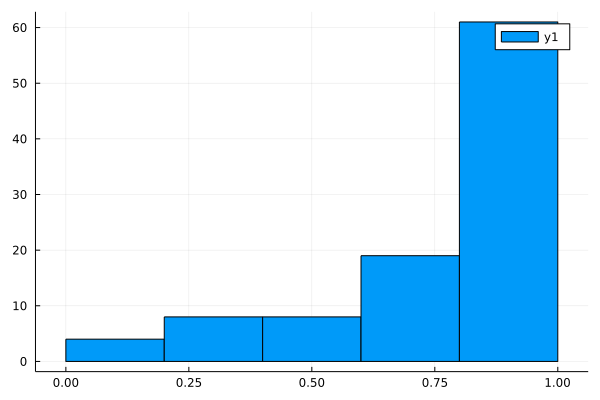

In [9]:
histogram(errors)

# Finding a parameter set that works

We need to find a parameter set which works for a single gene then use that for a homogeneous set of 10 genes.

In [39]:
N = 1

rn = generate_rn(N)

ps = (100., .1, 10., .1, .2, .1, .5, .1)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)
relative_error(mean(sol.u), lnameans)

4-element Array{Float64,1}:
 3.6014743298729e-6
 0.003223611766202783
 0.0007445570189075212
 0.00027771364039796964

In [43]:
relative_error(StatsBase.cov(sol.u), lnacovs)

4×4 Array{Float64,2}:
   0.00934119  423.123      0.142802    0.18716
 423.123         0.0101242  1.14126     0.0232458
   0.142802      1.14126    0.00348024  0.00493501
   0.18716       0.0232458  0.00493501  0.00413507

In [44]:
lnacovs

4×4 Array{Float64,2}:
 999.742     -0.129011    -49.7786      -24.7787
  -0.129011   0.166393      0.00916891    0.115229
 -49.7786     0.00916891   99.8153       49.797
 -24.7787     0.115229     49.797       149.631

In [45]:
StatsBase.cov(sol.u)

4×4 Array{Float64,2}:
 990.49         -0.000304184  -43.5584      -20.8722
  -0.000304184   0.164725       0.00428201    0.112611
 -43.5584        0.00428201    99.4691       50.044
 -20.8722        0.112611      50.044       150.252

Looks good so far...

In [47]:
N = 2

rn = generate_rn(N)

ps = (100., .1, 10., .1, .2, .1, .5, .1, 10., .1, .2, .1, .5, .1)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)
relative_error(mean(sol.u), lnameans)

7-element Array{Float64,1}:
 0.0001822081539484266
 0.005620471601711641
 0.00021480666794360115
 0.0009255122255943382
 0.006919582987137796
 0.00024405590059406457
 0.0003597917947558704

In [55]:
function run_homogeneous_case(N)
    rn = generate_rn(N)
    ps = [100., .1]
    
    for i in 1:N
        ps = vcat(ps, [10., .1, .2, .1, .5, .1])
    end
    
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)

    initial_values = map(Int64, map(ceil, lnameans))

    prob = DiscreteProblem(rn, initial_values, (0, 5000000.),  ps)
    jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

    sol = solve(jump_prob, SSAStepper(), saveat=100.0)
    return [relative_error(mean(sol.u), lnameans), relative_error(StatsBase.cov(sol.u), lnacovs)]
end

run_homogeneous_case (generic function with 1 method)

In [57]:
result = run_homogeneous_case(3)

2-element Array{Array{Float64,N} where N,1}:
 [4.0146789029527064e-5, 0.0016047826641427676, 0.0007096379314632806, 0.0008933201275684866, 0.005508758004251324, 0.00023721194963566283, 0.0004633323450875526, 0.009052562844920953, 0.0003641368276223744, 6.297114065434428e-5]
 [0.0011664408314253638 0.1868251750466272 … 0.007908276296433425 0.10564802301163523; 0.1868251750466272 0.01123646332563677 … 0.5360145417267483 1.1445446651439755; … ; 0.007908276296433425 0.5360145417267483 … 0.0010109553106325553 0.0012919459625844176; 0.10564802301163523 1.1445446651439755 … 0.0012919459625844176 7.929995787869792e-5]

In [58]:
result = run_homogeneous_case(4)

2-element Array{Array{Float64,N} where N,1}:
 [0.00043605354264064644, 0.00019824305306825885, 0.0008903008541979451, 0.0005417384801358338, 0.003963247476517551, 0.00038129005779674596, 0.0007613951477525305, 0.012104806520237266, 0.0003049538135951879, 0.00032539143122700676, 0.006110392571776813, 0.0003175914702655547, 0.0015115151082512046]
 [0.0030444500449684497 0.23937750279532666 … 0.016891017050969293 0.003925478701212404; 0.23937750279532666 0.006324412664393764 … 0.5303854450805598 0.8094364116929076; … ; 0.016891017050969293 0.5303854450805598 … 0.006222058609355319 0.0030974846447838766; 0.003925478701212404 0.8094364116929076 … 0.0030974846447838766 0.002640765157707392]